# Objective:
Find out which customer is more likely to churn, so the Bank can retain those customer


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Overview

In [ ]:
df = pd.read_csv("churn.csv")

In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


We can see that the we have 13 features and 10000 rows of data without null values.

### Duplicated Values

In [ ]:
#check duplicate values

df.duplicated().sum()

0

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


# Visualize the Data

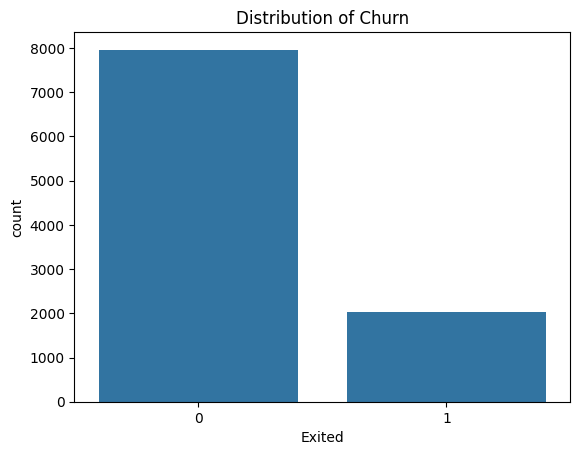

In [ ]:
sns.countplot(x='Exited', data=df)
plt.title("Distribution of Churn")
plt.show()

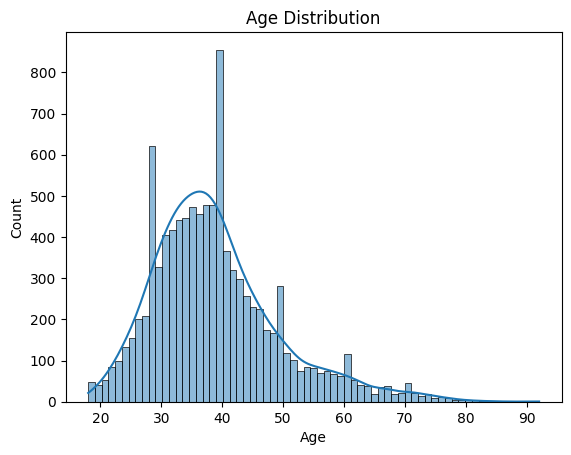

In [ ]:
sns.histplot(x='Age', data=df, kde=True)
plt.title("Age Distribution")
plt.show()

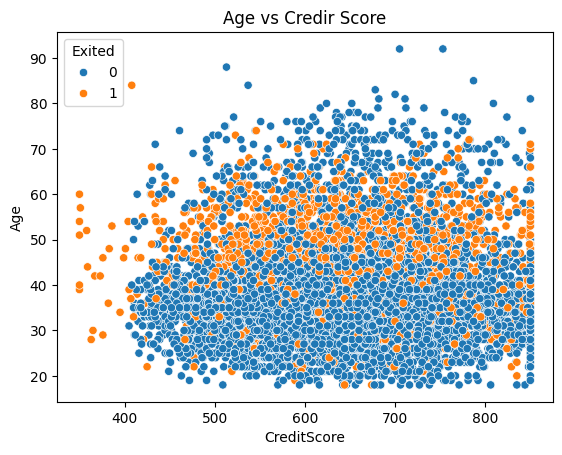

In [ ]:
sns.scatterplot(data=df, x='CreditScore', y='Age', hue='Exited')
plt.title("Age vs Credir Score")
plt.show()

**Obeservation:**\
From the data above, we can see that the customer who is older are more likely to churn

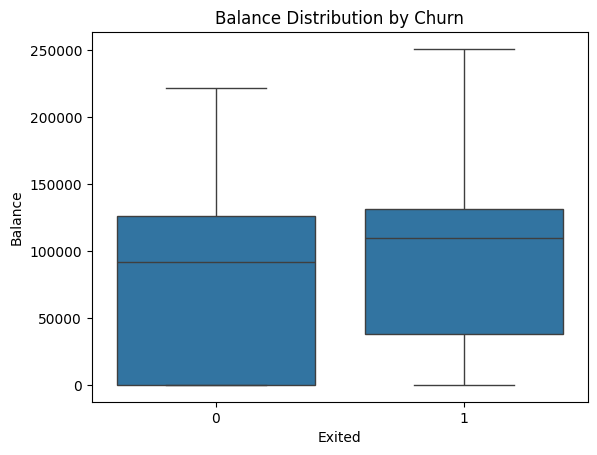

In [ ]:
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance Distribution by Churn")
plt.show()

**Obeservation:**\
Customer who churn seems to have higher account balance compare to the one who doesnt. This is important to notice, because the one who is more likely to churn has higher account balance in the bank

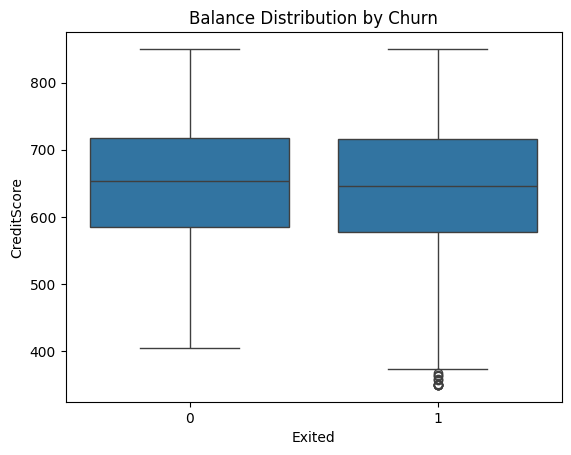

In [ ]:
sns.boxplot(x="Exited", y="CreditScore", data=df)
plt.title("Balance Distribution by Churn")
plt.show()

# Seperate features and target features

In [ ]:
features= df.drop('Exited', axis=1)

In [ ]:
target = df["Exited"]

In [ ]:
features.drop(['RowNumber', "CustomerId","Surname"], axis=1, inplace=True)

In [ ]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
features = pd.get_dummies(features, columns=["Geography", "Gender"],drop_first=True)
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [ ]:
import pickle

In [ ]:
model_list=[]
accuracy_score_list=[]
f1_score_list=[]
recall_score_list=[]

In [ ]:
def evaluate_and_save_model(model, X_train, X_test,y_train,  y_test, filename):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"\n{model.__class__.__name__} Accuracy: {accuracy}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print("--------------------------")
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

    print(f"Model saved to {filename}")
    print("------------------------------------------------------------------")
    model_list.append(model.__class__.__name__)
    accuracy_score_list.append(accuracy)
    f1_score_list.append(f1)
    recall_score_list.append(recall)

In [ ]:
evaluate_and_save_model(logistic, X_train, X_test, y_train,  y_test, 'logistic_model.pkl')


LogisticRegression Accuracy: 0.811
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

--------------------------
Model saved to logistic_model.pkl
------------------------------------------------------------------


In [ ]:
xgb_model = XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train,  y_test, 'xgb_model.pkl')

dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train, X_test, y_train,  y_test, 'dt_model.pkl')

rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, X_train, X_test, y_train,  y_test, 'rf_model.pkl')

knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train, X_test, y_train,  y_test, 'knn_model.pkl')

nb_model = GaussianNB()
evaluate_and_save_model(nb_model, X_train, X_test, y_train,  y_test, 'nb_model.pkl')

gb_model = GradientBoostingClassifier(random_state=42)
evaluate_and_save_model(gb_model, X_train, X_test, y_train,  y_test, 'gb_model.pkl')

cat_model = CatBoostClassifier(verbose=0, random_state=42)
evaluate_and_save_model(cat_model, X_train, X_test, y_train,  y_test, 'cat_model.pkl')


XGBClassifier Accuracy: 0.864
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000

--------------------------
Model saved to xgb_model.pkl
------------------------------------------------------------------

DecisionTreeClassifier Accuracy: 0.781
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.45      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000

--------------------------
Model saved to dt_model.pkl
---------------------------------------------------

In [ ]:
result_list = pd.DataFrame(list(zip(model_list, accuracy_score_list, f1_score_list, recall_score_list)), columns=['Model', 'Accuracy', 'F1 Score', 'Recall Score'])


In [ ]:
result_list

,Model,Accuracy,F1 Score,Recall Score
0,LogisticRegression,0.8110,0.294776,0.201018
1,XGBClassifier,0.8640,0.597633,0.513995
2,DecisionTreeClassifier,0.7810,0.474820,0.503817
3,RandomForestClassifier,0.8665,0.578199,0.465649
4,KNeighborsClassifier,0.8300,0.462025,0.371501
5,GaussianNB,0.8335,0.458537,0.358779
6,GradientBoostingClassifier,0.8675,0.591680,0.488550
7,CatBoostClassifier,0.8670,0.596970,0.501272


Because with the case of customer churn  in bank, it is better for us to retain customer. That is why we will focus on the recall score to choose our model

Now we will see the feature importance, to know which feature is the most importnant feature to decide whether customer will churn or not

In [ ]:
feature_importances = xgb_model.feature_importances_
feature_names = features.columns


In [ ]:
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

In [ ]:
feature_importances_df

,Feature,Importance
4,NumOfProducts,0.330930
6,IsActiveMember,0.195791
1,Age,0.109685
8,Geography_Germany,0.081833
3,Balance,0.054735
9,Geography_Spain,0.044963
10,Gender_Male,0.043983
0,CreditScore,0.036846
7,EstimatedSalary,0.035971
2,Tenure,0.033146


Text(0.5, 1.0, 'Feature Importance')

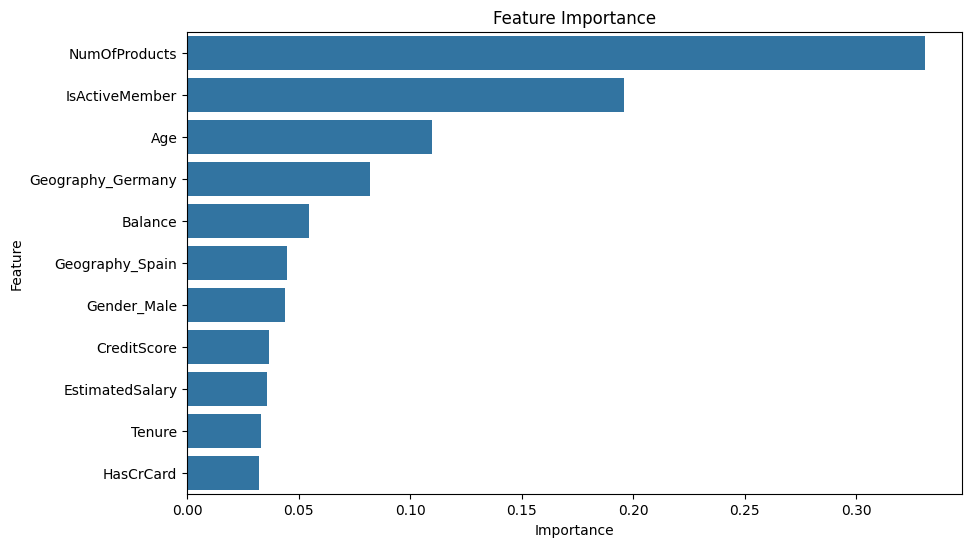

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')

# Feature Engineering

In [ ]:
features.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
features["Customer_Lifetime_Value"] = features["Balance"] * features["EstimatedSalary"] / 100000

In [ ]:
features.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Customer_Lifetime_Value
0,619,42,2,0.00,1,1,1,101348.88,False,False,False,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False,94319.527887
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False,181904.056115
3,699,39,1,0.00,2,0,0,93826.63,False,False,False,0.000000
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False,99259.102400


In [ ]:
features["Age_Group"] = pd.cut(df["Age"], bins=[0,30,45,60,100], labels=["Young", "Middle-Aged", "Senior", "Elderly"])

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Customer_Lifetime_Value,Age_Group
0,619,42,2,0.00,1,1,1,101348.88,False,False,False,0.000000,Middle-Aged
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False,94319.527887,Middle-Aged
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False,181904.056115,Middle-Aged
3,699,39,1,0.00,2,0,0,93826.63,False,False,False,0.000000,Middle-Aged
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False,99259.102400,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True,0.000000,Middle-Aged
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True,58344.761420,Middle-Aged
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False,0.000000,Middle-Aged
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True,69736.344344,Middle-Aged


In [ ]:
features["Tenure_Age_Ratio"] = features["Tenure"] / features["Age"]

In [ ]:
features = pd.get_dummies(features, columns=["Age_Group"], drop_first=True)

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Customer_Lifetime_Value,Tenure_Age_Ratio,Age_Group_Middle-Aged,Age_Group_Senior,Age_Group_Elderly
0,619,42,2,0.00,1,1,1,101348.88,False,False,False,0.000000,0.047619,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False,94319.527887,0.024390,True,False,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False,181904.056115,0.190476,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False,0.000000,0.025641,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False,99259.102400,0.046512,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True,0.000000,0.128205,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True,58344.761420,0.285714,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False,0.000000,0.194444,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True,69736.344344,0.071429,True,False,False


### Train Test Split - II

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Using XGB model again

In [ ]:
xgb_model = XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train,  y_test, 'xgb_featureEngineered.pkl')


XGBClassifier Accuracy: 0.863
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.86      2000

--------------------------
Model saved to xgb_featureEngineered.pkl
------------------------------------------------------------------


# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
evaluate_and_save_model(xgb_model, X_train_smote, X_test, y_train_smote,  y_test, 'xgb_smote.pkl')


XGBClassifier Accuracy: 0.8565
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.65      0.60      0.62       393

    accuracy                           0.86      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.85      0.86      0.85      2000

--------------------------
Model saved to xgb_smote.pkl
------------------------------------------------------------------


# Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_model = VotingClassifier(estimators=[('xgb', xgb_model), ('rf', rf_model), ('dt', dt_model), ("gb", gb_model), ("cat", cat_model)], voting='hard')

In [ ]:
evaluate_and_save_model(voting_model, X_train_smote, X_test, y_train_smote,  y_test, 'voting_model.pkl')


VotingClassifier Accuracy: 0.858
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.65      0.60      0.62       393

    accuracy                           0.86      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.85      0.86      0.86      2000

--------------------------
Model saved to voting_model.pkl
------------------------------------------------------------------


# Need to do:
- Create better documentation and EDA


# Future Use

Create the model in dictionary like this and create function that will do for loop

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [ ]:
def evaluate_models(model, X_train, y_train, X_test, y_test, cv=5):
  for name, model in models.items():
    model.fit(X_train, y_train)

     # Predictions on the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy and F1 score on training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Calculate accuracy and F1 score on test data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Cross val score
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_mean = np.mean(cv_scores)
    cv_std = np.std(cv_scores)

    # Print out the results
    print(f"{name} Results:")
    print(f"  Training Accuracy: {train_accuracy:.4f}")
    print(f"  Training F1 Score: {train_f1:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Test F1 Score: {test_f1:.4f}")
    print(f"  Cross-Validation Accuracy: {cv_mean:.4f} ± {cv_std:.4f}")
    print("-" * 50)

In [ ]:
cv_scores2 = cross_val_score(LogisticRegression(), X_train, y_train, cv=5, scoring='accuracy')
cv_mean2 = np.mean(cv_scores2)
cv_std2 = np.std(cv_scores2)

In [ ]:
evaluate_models(models, X_train, y_train, X_test, y_test)

Logistic Regression Results:
  Training Accuracy: 0.8114
  Training F1 Score: 0.7737
  Test Accuracy: 0.8110
  Test F1 Score: 0.7737
  Cross-Validation Accuracy: 0.8104 ± 0.0103
--------------------------------------------------
K-Nearest Neighbors Results:
  Training Accuracy: 0.8741
  Training F1 Score: 0.8626
  Test Accuracy: 0.8300
  Test F1 Score: 0.8132
  Cross-Validation Accuracy: 0.8251 ± 0.0022
--------------------------------------------------
Support Vector Classifier Results:
  Training Accuracy: 0.8654
  Training F1 Score: 0.8462
  Test Accuracy: 0.8560
  Test F1 Score: 0.8359
  Cross-Validation Accuracy: 0.8545 ± 0.0064
--------------------------------------------------
Decision Tree Results:
  Training Accuracy: 1.0000
  Training F1 Score: 1.0000
  Test Accuracy: 0.7805
  Test F1 Score: 0.7854
  Cross-Validation Accuracy: 0.7851 ± 0.0096
--------------------------------------------------
Random Forest Results:
  Training Accuracy: 1.0000
  Training F1 Score: 1.0000
  Tes